In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm

In [2]:
f = xr.open_mfdataset('./MLMOutput_basic_fxdlhf_20210330_highres.nc',
                      combine = 'by_coords',decode_cf = False)

In [3]:
myfontsize = 12

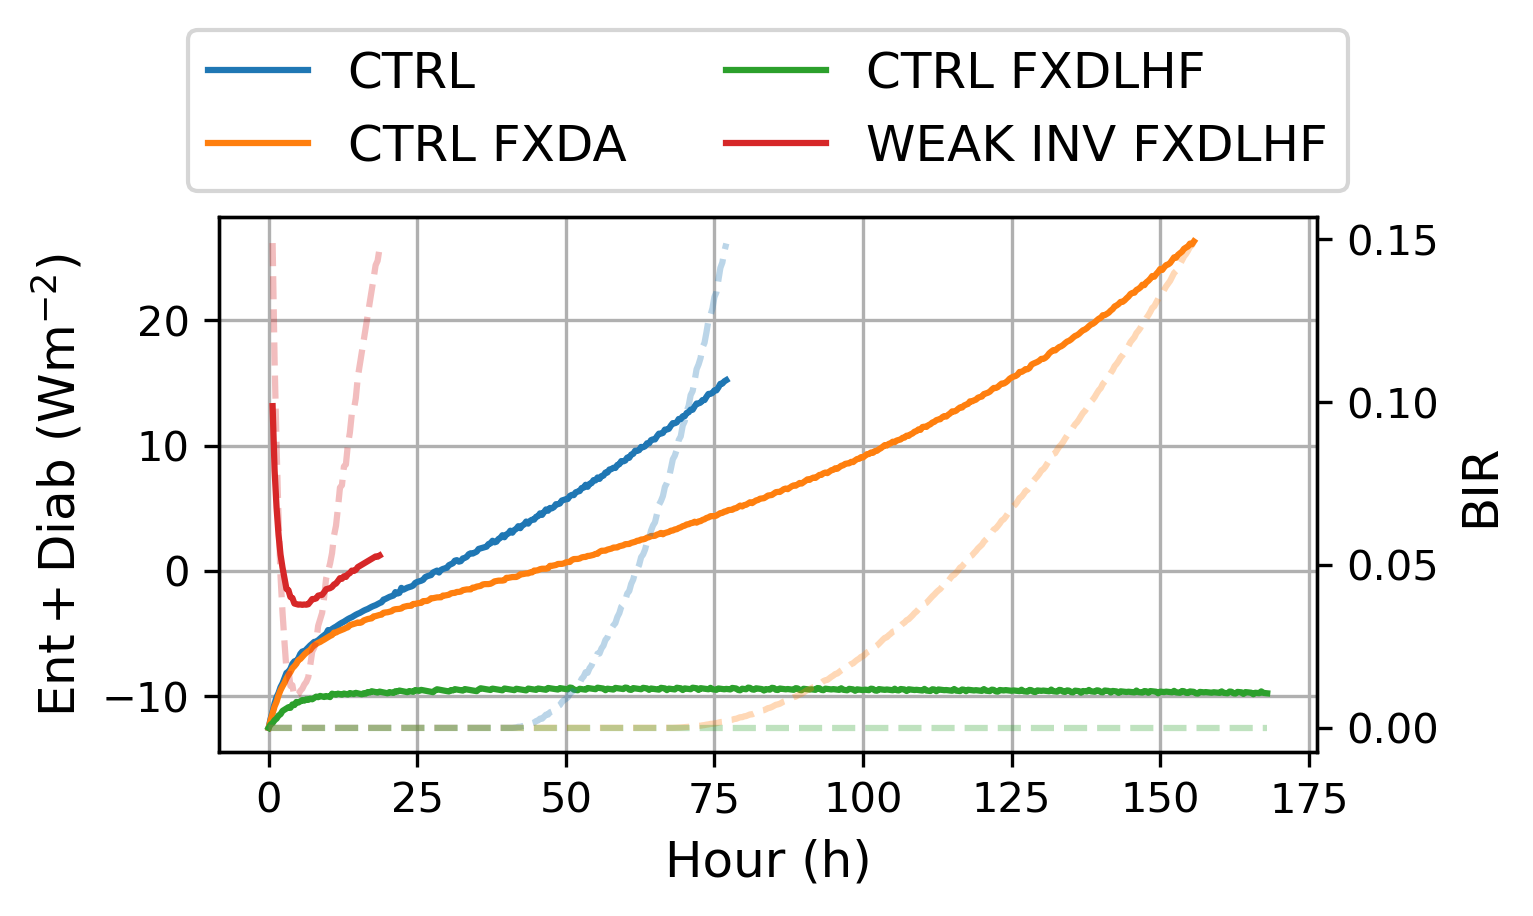

In [21]:
fig, axs = plt.subplots(ncols = 1,
                        nrows = 1,
                        figsize=(12/2.54, (6)/2.54), dpi = 300)

axs.plot(f['t_hr'].where(f['BIR'].isel(x = 0) < 0.15), 
         f['Ent_CLEB'].isel(x = 0).where(f['BIR'].isel(x = 0) < 0.15) + 
         f['Diab_CLEB'].isel(x = 0).where(f['BIR'].isel(x = 0) < 0.15), label='CTRL')

axs.plot(f['t_hr'].where(f['BIR'].isel(x = 2) < 0.15), 
         f['Ent_CLEB'].isel(x = 2).where(f['BIR'].isel(x = 2) < 0.15) + 
         f['Diab_CLEB'].isel(x = 2).where(f['BIR'].isel(x = 2) < 0.15), label='CTRL FXDA')

axs.plot(f['t_hr'].where(f['BIR'].isel(x = 1) < 0.15), 
         f['Ent_CLEB'].isel(x = 1).where(f['BIR'].isel(x = 1) < 0.15) + 
         f['Diab_CLEB'].isel(x = 1).where(f['BIR'].isel(x = 1) < 0.15), label='CTRL FXDLHF')

axs.plot(f['t_hr'].where(f['BIR'].isel(x = 3) < 0.15), 
         f['Ent_CLEB'].isel(x = 3).where(f['BIR'].isel(x = 3) < 0.15) + 
         f['Diab_CLEB'].isel(x = 3).where(f['BIR'].isel(x = 3) < 0.15), label='WEAK INV FXDLHF')

axs.set_ylabel(r"$\mathrm{Ent + Diab \ (W m^{-2})}$", fontsize=myfontsize)
axs.set_xlabel("Hour (h)", fontsize=myfontsize)
axs.grid(True)
axs.legend(bbox_to_anchor=(0.5,1.2), loc="center", fontsize=myfontsize, ncol = 2)

axs0 = axs.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
axs0.set_ylabel('BIR', color='black', fontsize=myfontsize)  # we already handled the x-label with ax1

axs0.plot(f['t_hr'].where(f['BIR'].isel(x = 0) < 0.15), 
          f['BIR'].isel(x = 0).where(f['BIR'].isel(x = 0) < 0.15), 
          linestyle = '--',color = 'tab:blue',label='CTRL', alpha=0.3)

axs0.plot(f['t_hr'].where(f['BIR'].isel(x = 2) < 0.15), 
          f['BIR'].isel(x = 2).where(f['BIR'].isel(x = 2) < 0.15), 
          linestyle = '--',color = 'tab:orange',label='CTRL FXDA', alpha=0.3)

axs0.plot(f['t_hr'].where(f['BIR'].isel(x = 1) < 0.15), 
          f['BIR'].isel(x = 1).where(f['BIR'].isel(x = 1) < 0.15), 
          linestyle = '--',color = 'tab:green',label='CTRL FXDLHF', alpha=0.3)

axs0.plot(f['t_hr'].where(f['BIR'].isel(x = 3) < 0.15), 
          f['BIR'].isel(x = 3).where(f['BIR'].isel(x = 3) < 0.15), 
          linestyle = '--',color = 'tab:red',label='WEAK INV FXDLHF', alpha=0.3)

fig.savefig('Fig7_MLM.png', dpi=fig.dpi, bbox_inches='tight')